# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed

medical = pd.read_csv(r'C:\Users\Katarina\Desktop\insurance2.csv')

In [12]:
medical.shape

(1338, 8)

In [13]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

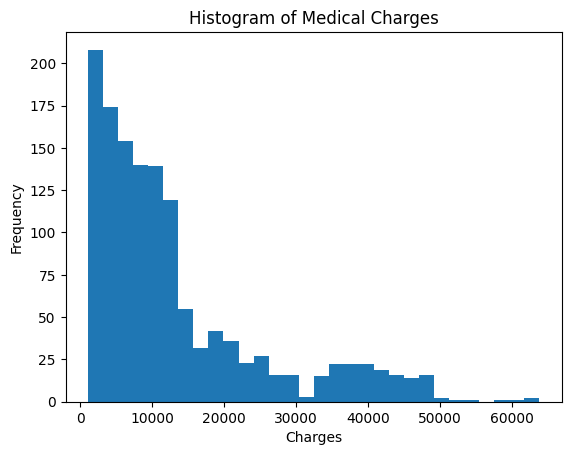

In [14]:
plt.hist(medical['charges'], bins=30)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Medical Charges')
plt.show()

In [15]:
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'])

print("Mean charges:", mean_charges)
print("Standard deviation of charges:", std_charges)

Mean charges: 13270.422265141257
Standard deviation of charges: 12105.484975561612


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:  On the assumption that these data represent a random sample charges, to justify that these data allow you to answer the administrator's question, random sampling allows us to make inferences about the population from which the sample was drawn.  This is a fundamental principle of statistical inference.  The most appropriate frequentist test to apply for this situation would be a one-sample t-test because we are comparing a sample mean to a specific value; dealing with charges, which are a continuous variable; are unaware of the population standard deviation; and testing for whether the mean has fallen below a certain value hence needing a one-tailed test.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:  The confidence interval appropriate is a one-sided interval because we are only interested in whether the mean charge is below a certain threshold (12,000), aligning with the concern of the administrator.  If the lower bound of the confidence interval is above 12,000, the administrator should not be concerned.  We can be 95% confident that the true population mean is above this value.  However, if the lower bound is below 12,000, the administrator should be concerned.

In [16]:
n = len(medical['charges'])
t_critical = t.ppf(0.95, df=n-1)

sample_mean = medical['charges'].mean()
sample_std = medical['charges'].std(ddof=1)
margin_of_error = t_critical * (sample_std / np.sqrt(n))

lower_bound = sample_mean - margin_of_error

print(f"95% Lower Confidence Bound: ${lower_bound:.2f}")
print(f"Sample Mean: ${sample_mean:.2f}")

95% Lower Confidence Bound: $12725.49
Sample Mean: $13270.42


In [17]:
df = len(medical['charges']) - 1
alpha = 0.05
t_critical = t.ppf(1 - alpha, df)

print("Critical value:", t_critical)

Critical value: 1.6459941145571317


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

A:  Null Hypothesis (H0): There is no difference in the mean charges between people with insurance and those without insurance.
H0: μ_insured - μ_uninsured = 0
Alternative Hypothesis (H1): There is a difference in the mean charges between people with insurance and those without insurance. 
H1: μ_insured - μ_uninsured ≠ 0
We are making the assumption that the variances of the two groups are equal (assumption of homogeneity of variances, ie homoscedasticity)

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [21]:
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

mean_insured = np.mean(insured)
mean_uninsured = np.mean(uninsured)
std_insured = np.std(insured, ddof=1)
std_uninsured = np.std(uninsured, ddof=1)

# Calculate the pooled standard deviation
n1, n2 = len(insured), len(uninsured)
pooled_std = np.sqrt(((n1-1)*std_insured**2 + (n2-1)*std_uninsured**2) / (n1+n2-2))
# Calculate the t-statistic
t_stat = (mean_insured - mean_uninsured) / (pooled_std * np.sqrt(1/n1 + 1/n2))
# Calculate the degrees of freedom
df = n1 + n2 - 2
# Calculate the p-value
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print(f"Manual t-statistic: {t_stat}")
print(f"Manual p-value: {p_value}")

Manual t-statistic: 11.89329903087671
Manual p-value: 0.0


In [19]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(insured, uninsured)

print(f"Scipy t-statistic: {t_stat}")
print(f"Scipy p-value: {p_value}")

Scipy t-statistic: 11.893299030876712
Scipy p-value: 4.461230231620717e-31


In [ ]:
The manual p-value rounded to 0.0 due to the extremely small magnitude.  The scipy function gives a more precise representation of the p-value in scientific notion.  Both represent the same extremely small p-value with the manual rounding to zero due to negligible size.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

A:  There is no equivalent for performing a z-test from a sample in scipy.stats.  Z-tests are used when we know the population standard deviation, which in real world scenarios and applications, is quite rare.  On the contrary, t-tests use the sample deviation as an estimate of the population standard deviation, making it more applicable.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test